In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
sns.set()
plt.rc('axes',titlesize='xx-large')
plt.rc('axes',labelsize='x-large')
plt.rc('legend',fontsize='x-large')
plt.rc('ti')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
np.random.seed(0)
np.set_printoptions(suppress=True, precision=2)
import pickle

with open('../data/acc_grid', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    acc_grid =pickle.load(f)
    
with open('../data/loss_grid', 'rb') as f:
    loss_grid =pickle.load(f)

# An introduction to neural networks with Keras
Dr. Florent Martin (Universität Regensburg)  
March 2018

**MACHINE LEARNING**
* choose a **MODEL** which depends on **PARAMETERS**
*  learn from **DATA**
* choose model parameters that **FIT** the data

**Neural Networks**  =  family of models

**Keras** = Python Library for Neural networks

<img style="height:600px;margin: -5px 0px 0px 100px" src="../reports/figures/table1.png">

1. Logistic regression
  1. Iris Dataset
  3. Logistic regression with scikit-learn
  4. Logistic regression with Keras
1. Gradient descent 
  1. Optimization
  2. Loss function
1. Neural networks
  1. Versicolor
  2. Logistic regression again
  3. Neural networks with hidden layers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Part 1  
# Before neural networks: Logistic regression

# 1.1. Iris dataset

In [3]:
iris  = sns.load_dataset("iris")
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
114,5.8,2.8,5.1,2.4,virginica
62,6.0,2.2,4.0,1.0,versicolor
33,5.5,4.2,1.4,0.2,setosa
107,7.3,2.9,6.3,1.8,virginica
7,5.0,3.4,1.5,0.2,setosa


In [4]:
iris.shape

(150, 5)

In [5]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<center><font size=7>Setosa</font></center> | <center><font size=7>**Versicolor**</font></center> | <center><font size=7> **Virginica** </font></center>
---|---|---
![setosa](../reports/setosa.jpg "setosa") | ![setosa](../reports/versicolor.jpg) | ![setosa](../reports/virginica.jpg)

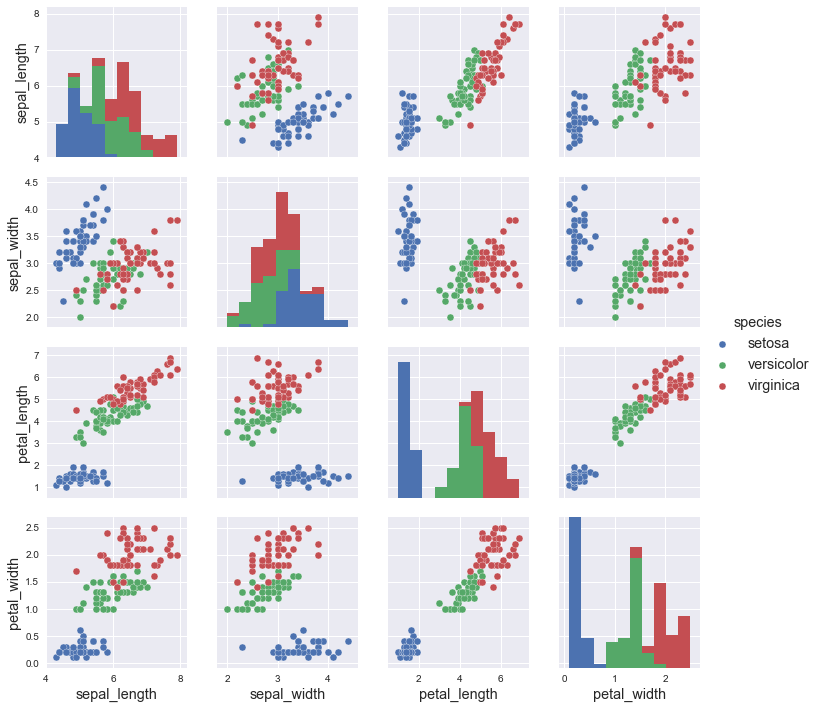

In [6]:
sns.pairplot(iris, hue="species");

### Goal: knowing the petal width, predict if the iris is a virginica  

**Input** = petal width

**output** =  False / 0 or True / 1

In [11]:
iris['isVirginica'] = (iris['species'] == 'virginica').astype(int)
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,isVirginica
38,4.4,3.0,1.3,0.2,setosa,0
46,5.1,3.8,1.6,0.2,setosa,0
28,5.2,3.4,1.4,0.2,setosa,0
94,5.6,2.7,4.2,1.3,versicolor,0
148,6.2,3.4,5.4,2.3,virginica,1


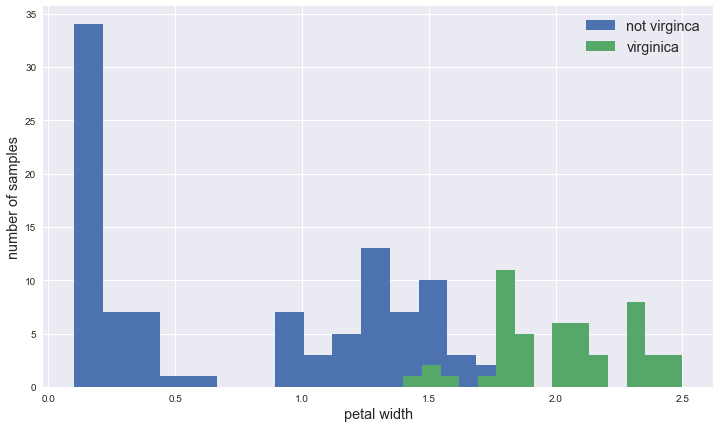

In [12]:
fig, ax = plt.subplots(figsize=(12,7))
iris.groupby('isVirginica').hist(column='petal_width', ax = ax, bins=15);
plt.legend(['not virginca', 'virginica']);
plt.xlabel('petal width')
plt.title('');
plt.ylabel('number of samples');

![guess the probabilities](../reports/probas1.png)

![guess the probabilities](../reports/probas2.png)

![guess the probabilities](../reports/probas3.png)

# Logistic regression

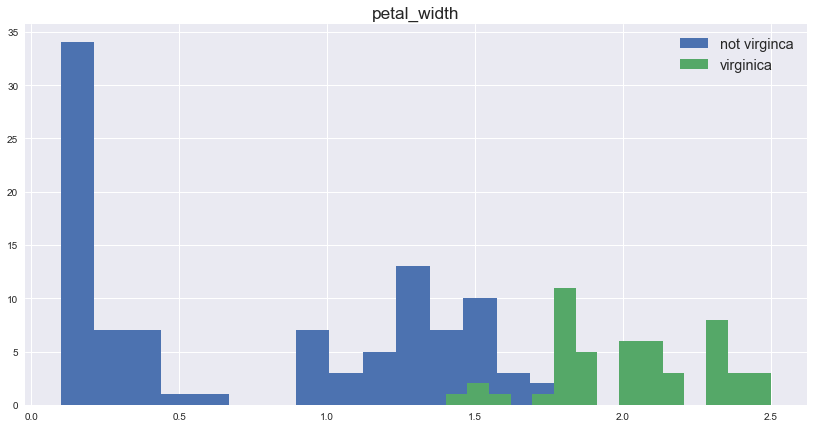

In [14]:
fig, ax = plt.subplots(figsize=(14,7))
iris.groupby('isVirginica').hist(column='petal_width', ax=ax, bins=15);
plt.legend(['not virginca', 'virginica']);

<font size=6>
**Logistic regression** returns a function 
<br><br>
$$ P: [0,3] \to [0,1]$$
</font>
* $x = $ petal width 
* $P(x) =$ estimate of the probability that the plant is a virginica.
<br><br>
$$0\leq P(x) <\leq 1$$

# Sigmoid function
<br><br>
$$ \sigma : x \mapsto  \frac{1}{1+e^{-x}}$$

In [17]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

In [16]:
plt.rc('xtick',labelsize='xx-large')
plt.rc('ytick',labelsize='xx-large')

In [ ]:
#plt.rcParams
plt.rc('figure',figsize=(14,7))

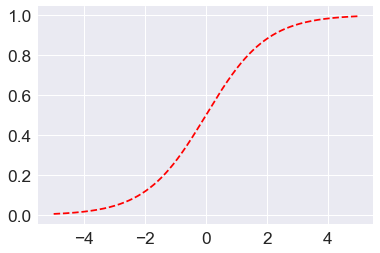

In [18]:
x = np.arange(-5, 5, .01)
plt.plot(x, sigmoid(x),'r--',label='sigmoid');

In [ ]:
plt.rc('figure',figsize=(14,7))
fig, ax = plt.subplots()
#x = np.arange(0,3,.01)
iris.groupby('isVirginica').hist(column='petal_width', \
                                 normed=True, ax=ax, alpha=.8);
plt.legend(['not virginca', 'virginica'])
#W=3; B=-5
plt.plot(x, sigmoid(W*x+B),'r--',linewidth=4);

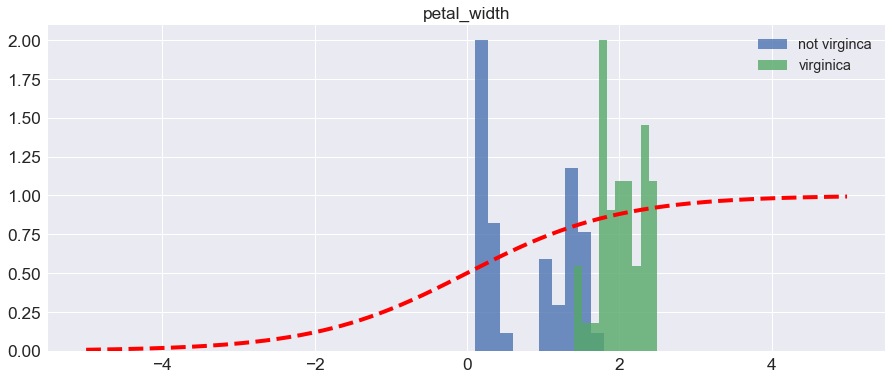

In [19]:
fig, ax = plt.subplots(figsize=(15,6))
iris.groupby('isVirginica').hist(column='petal_width', \
                                 normed=True, ax=ax, alpha=.8);
plt.legend(['not virginca', 'virginica'])
w = 1 # w is the weight -- the 1st parameter of our model
b = 0 # b is the bias -- the 2sd parameter of our model
plt.plot(x, sigmoid(w*x + b),'r--', linewidth=4);

<font size=6>
**Logistic regression** is a model depending on paramters $W$ and $B$.  
    <br>
For an **input x** it  ouputs the probability
<br><br>
$$P_{W,B}(x) = \sigma(Wx+B)$$
where     
$$ \sigma : x \mapsto  \frac{1}{1+e^{-x}}$$
is the **sigmoid function **.   
    <br>
We call $W$ the **weight** and $B$  the **bias**.
</font>

## 1.2 Logistic Regression with Scikit-learn

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
model.fit(iris[['petal_width']], iris['isVirginica'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
model.coef_ , model.intercept_

(array([[2.62]]), array([-4.22]))

In [ ]:
plt.rc('figure',figsize=(12,6))

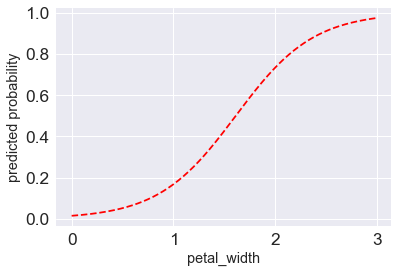

In [23]:
petal_widths = np.arange(0,3,0.01)
predicted_proba = model.predict_proba(petal_widths.reshape(-1,1))[:,1]
plt.plot(petal_widths, predicted_proba, 'r--')
plt.xlabel('petal_width')
plt.ylabel('predicted probability');

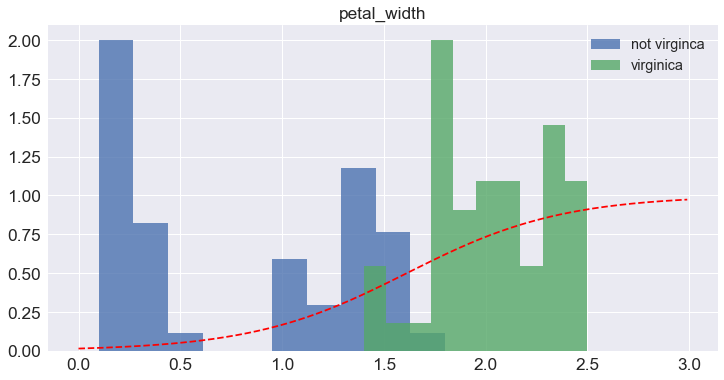

In [24]:
fig, ax = plt.subplots(figsize=(12,6))
iris.groupby('isVirginica').hist(column='petal_width', normed=True, ax=ax, alpha=.8);
plt.legend(['not virginca', 'virginica'])
plt.plot(petal_widths, predicted_proba,'r--');

### How to evaluate the model?  

<font size=5>
$$ \textbf{Accuracy} = \frac{\text{number of samples correctly classified}}{\text{total number of samples}}$$
<size>

In [25]:
model.score(iris[['petal_width']], iris[['isVirginica']])

0.96

# 1.4 Keras

In [26]:
from keras import regularizers, optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import SVG

Using TensorFlow backend.


### Graphical representation of logistic regression
Choose the parameters:

* W (the weight)
* B (the bias)

![logistic regression](../reports/figures/01-log.png)

![logistic regression](../reports/figures/01-log.png)

In [27]:
model = Sequential([
    Dense(1, input_dim=1), # for the map x -> W*x + B
    Activation('sigmoid') # for the sigmoid function
])
model.compile(optimizer='sgd', loss='binary_crossentropy')

In [28]:
model.fit(iris[['petal_width']], iris[['isVirginica']], \
          epochs=500, verbose=False);
model.get_weights()

[array([[1.52]], dtype=float32), array([-2.42], dtype=float32)]

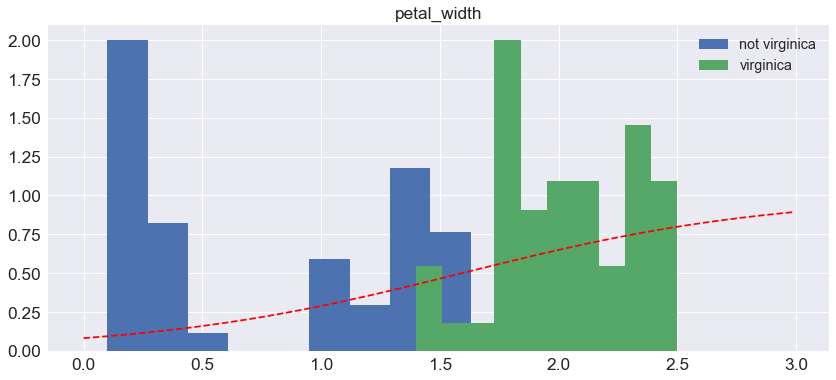

In [29]:
fig, ax = plt.subplots(figsize=(14,6))
iris.groupby('isVirginica').hist(column='petal_width', normed=True, ax=ax);
plt.legend(['not virginica', 'virginica'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths, predicted_proba,'r--');

# (Section 2) Gradient descent

## How does this logistic regression work? 

# 2.1 Optimization, gradient descent with Keras

In [41]:
model = Sequential([
    Dense(1,input_dim=1, kernel_regularizer=regularizers.l2(.1)),
    Activation('sigmoid'), 
]) 

In [43]:
model.compile(optimizer='sgd', 
              loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(iris[['petal_width']], iris[['isVirginica']], epochs=500)

Epoch 1/500
150/150 [==============================] - 0s 92us/step - loss: 0.5216 - acc: 0.8200
Epoch 2/500
150/150 [==============================] - 0s 79us/step - loss: 0.5215 - acc: 0.8200
Epoch 3/500
150/150 [==============================] - 0s 76us/step - loss: 0.5214 - acc: 0.8200
Epoch 4/500
150/150 [==============================] - 0s 101us/step - loss: 0.5215 - acc: 0.8200
Epoch 5/500
150/150 [==============================] - 0s 88us/step - loss: 0.5214 - acc: 0.8200
Epoch 6/500
150/150 [==============================] - 0s 82us/step - loss: 0.5214 - acc: 0.8200
Epoch 7/500
150/150 [==============================] - 0s 80us/step - loss: 0.5215 - acc: 0.8200
Epoch 8/500
150/150 [==============================] - 0s 86us/step - loss: 0.5214 - acc: 0.8200
Epoch 9/500
150/150 [==============================] - 0s 80us/step - loss: 0.5214 - acc: 0.8200
Epoch 10/500
150/150 [==============================] - 0s 89us/step - loss: 0.5214 - acc: 0.8200
Epoch 11/500
150/150 [======

150/150 [==============================] - 0s 108us/step - loss: 0.5205 - acc: 0.8200
Epoch 84/500
150/150 [==============================] - ETA: 0s - loss: 0.5682 - acc: 0.781 - 0s 103us/step - loss: 0.5204 - acc: 0.8200
Epoch 85/500
150/150 [==============================] - 0s 76us/step - loss: 0.5204 - acc: 0.8200
Epoch 86/500
150/150 [==============================] - 0s 84us/step - loss: 0.5205 - acc: 0.8200
Epoch 87/500
150/150 [==============================] - 0s 82us/step - loss: 0.5204 - acc: 0.8200
Epoch 88/500
150/150 [==============================] - 0s 77us/step - loss: 0.5204 - acc: 0.8200
Epoch 89/500
150/150 [==============================] - 0s 67us/step - loss: 0.5203 - acc: 0.8200
Epoch 90/500
150/150 [==============================] - 0s 91us/step - loss: 0.5204 - acc: 0.8200
Epoch 91/500
150/150 [==============================] - 0s 84us/step - loss: 0.5204 - acc: 0.8200
Epoch 92/500
150/150 [==============================] - 0s 90us/step - loss: 0.5203 - acc: 

150/150 [==============================] - 0s 70us/step - loss: 0.5198 - acc: 0.8200
Epoch 166/500
150/150 [==============================] - ETA: 0s - loss: 0.4474 - acc: 0.968 - 0s 100us/step - loss: 0.5198 - acc: 0.8200
Epoch 167/500
150/150 [==============================] - 0s 88us/step - loss: 0.5198 - acc: 0.8200
Epoch 168/500
150/150 [==============================] - 0s 78us/step - loss: 0.5200 - acc: 0.8200
Epoch 169/500
150/150 [==============================] - 0s 89us/step - loss: 0.5199 - acc: 0.8200
Epoch 170/500
150/150 [==============================] - 0s 93us/step - loss: 0.5199 - acc: 0.8200
Epoch 171/500
150/150 [==============================] - 0s 85us/step - loss: 0.5198 - acc: 0.8200
Epoch 172/500
150/150 [==============================] - 0s 92us/step - loss: 0.5198 - acc: 0.8200
Epoch 173/500
150/150 [==============================] - 0s 81us/step - loss: 0.5198 - acc: 0.8200
Epoch 174/500
150/150 [==============================] - 0s 88us/step - loss: 0.5198

150/150 [==============================] - 0s 93us/step - loss: 0.5195 - acc: 0.8200
Epoch 247/500
150/150 [==============================] - 0s 95us/step - loss: 0.5196 - acc: 0.8200
Epoch 248/500
150/150 [==============================] - 0s 104us/step - loss: 0.5195 - acc: 0.8200
Epoch 249/500
150/150 [==============================] - 0s 83us/step - loss: 0.5196 - acc: 0.8200
Epoch 250/500
150/150 [==============================] - 0s 79us/step - loss: 0.5195 - acc: 0.8200
Epoch 251/500
150/150 [==============================] - 0s 76us/step - loss: 0.5195 - acc: 0.8200
Epoch 252/500
150/150 [==============================] - 0s 78us/step - loss: 0.5195 - acc: 0.8200
Epoch 253/500
150/150 [==============================] - 0s 90us/step - loss: 0.5195 - acc: 0.8200
Epoch 254/500
150/150 [==============================] - 0s 78us/step - loss: 0.5195 - acc: 0.8200
Epoch 255/500
150/150 [==============================] - 0s 92us/step - loss: 0.5195 - acc: 0.8200
Epoch 256/500
150/150 [

150/150 [==============================] - 0s 95us/step - loss: 0.5194 - acc: 0.8200
Epoch 328/500
150/150 [==============================] - 0s 88us/step - loss: 0.5194 - acc: 0.8200
Epoch 329/500
150/150 [==============================] - 0s 71us/step - loss: 0.5194 - acc: 0.8200
Epoch 330/500
150/150 [==============================] - 0s 90us/step - loss: 0.5195 - acc: 0.8200
Epoch 331/500
150/150 [==============================] - 0s 84us/step - loss: 0.5194 - acc: 0.8200
Epoch 332/500
150/150 [==============================] - 0s 88us/step - loss: 0.5193 - acc: 0.8200
Epoch 333/500
150/150 [==============================] - 0s 82us/step - loss: 0.5194 - acc: 0.8200
Epoch 334/500
150/150 [==============================] - 0s 75us/step - loss: 0.5193 - acc: 0.8200
Epoch 335/500
150/150 [==============================] - 0s 97us/step - loss: 0.5193 - acc: 0.8200
Epoch 336/500
150/150 [==============================] - 0s 98us/step - loss: 0.5194 - acc: 0.8200
Epoch 337/500
150/150 [=

150/150 [==============================] - 0s 70us/step - loss: 0.5193 - acc: 0.8200
Epoch 408/500
150/150 [==============================] - 0s 86us/step - loss: 0.5193 - acc: 0.8200
Epoch 409/500
150/150 [==============================] - 0s 65us/step - loss: 0.5193 - acc: 0.8200
Epoch 410/500
150/150 [==============================] - 0s 72us/step - loss: 0.5193 - acc: 0.8200
Epoch 411/500
150/150 [==============================] - 0s 72us/step - loss: 0.5194 - acc: 0.8200
Epoch 412/500
150/150 [==============================] - 0s 83us/step - loss: 0.5193 - acc: 0.8200
Epoch 413/500
150/150 [==============================] - 0s 62us/step - loss: 0.5193 - acc: 0.8200
Epoch 414/500
150/150 [==============================] - 0s 86us/step - loss: 0.5193 - acc: 0.8200
Epoch 415/500
150/150 [==============================] - 0s 73us/step - loss: 0.5193 - acc: 0.8200
Epoch 416/500
150/150 [==============================] - 0s 70us/step - loss: 0.5194 - acc: 0.8200
Epoch 417/500
150/150 [=

Epoch 489/500
150/150 [==============================] - 0s 90us/step - loss: 0.5192 - acc: 0.8200
Epoch 490/500
150/150 [==============================] - 0s 90us/step - loss: 0.5193 - acc: 0.8200
Epoch 491/500
150/150 [==============================] - 0s 77us/step - loss: 0.5192 - acc: 0.8200
Epoch 492/500
150/150 [==============================] - 0s 86us/step - loss: 0.5193 - acc: 0.8200
Epoch 493/500
150/150 [==============================] - 0s 85us/step - loss: 0.5193 - acc: 0.8200
Epoch 494/500
150/150 [==============================] - 0s 77us/step - loss: 0.5192 - acc: 0.8200
Epoch 495/500
150/150 [==============================] - 0s 83us/step - loss: 0.5192 - acc: 0.8200
Epoch 496/500
150/150 [==============================] - 0s 97us/step - loss: 0.5192 - acc: 0.8200
Epoch 497/500
150/150 [==============================] - 0s 93us/step - loss: 0.5193 - acc: 0.8200
Epoch 498/500
150/150 [==============================] - 0s 84us/step - loss: 0.5193 - acc: 0.8200
Epoch 499/

In [46]:
x_grid, y_grid = np.mgrid[-10:10:.1,-10:10:.1]

In [47]:
def get_accuracy(weight,bias):
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    accuracy= model.evaluate(iris[['petal_width']], \
                              iris[['isVirginica']],verbose=0)[1]
    return accuracy
vaccuracy = np.vectorize(get_accuracy)

In [ ]:
import pickle
with open('../data/acc_grid', 'rb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    acc_grid =pickle.load(f)

In [ ]:
acc_grid = vaccuracy(x_grid,y_grid)

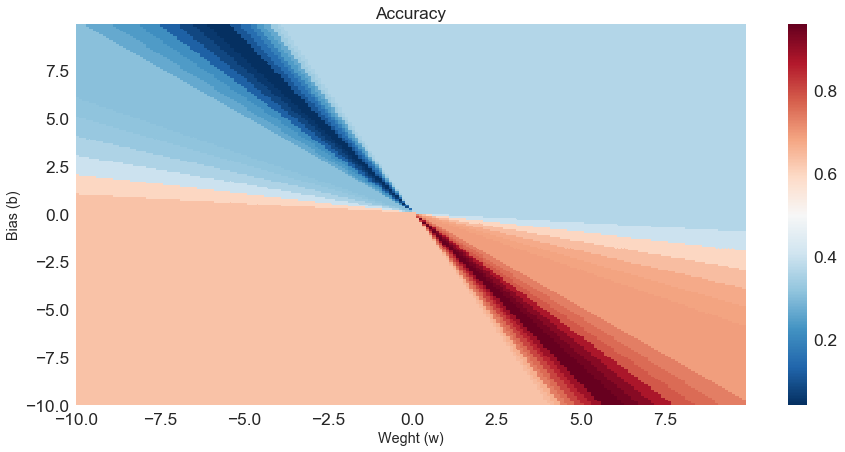

In [48]:
fig,ax_acc = plt.subplots(figsize=(15,7))
plt.pcolor(x_grid , y_grid , acc_grid , cmap='RdBu_r')
plt.colorbar()
ax_acc.set(title='Accuracy', xlabel='Weght (w)', ylabel='Bias (b)');

## Problem: the accuracy is constant on huge zones

# 2.2 The cross entropy  loss function

<font size=6>
$$\mathcal{L}(p,y) := y \log(p) + (1-y)\log(1-p)$$
 <br>
$$\text{Loss} :=\sum_{i=1}^n \mathcal{L}(p_i,y_i) = \sum_{i=1}^n y_i \log(p_i) + (1-y_i)\log(1-p_i)$$
<br>
where </font>

*  <font size=6>$y_i\in \{0,1\}$ is the class of the i-th sample</font>

*  <font size=6>$p_i \in [0,1]$ is the predicted probability $P(x_i)$ calculated by the model</font>

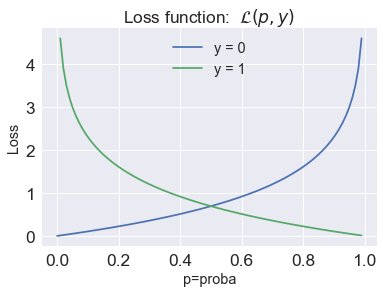

In [49]:
probas = np.arange(0,1,.01)
loss0 = -np.log(1-probas)
loss1 = - np.log(probas)
plt.plot(probas,loss0,label='y = 0')
plt.plot(probas,loss1,label='y = 1')
plt.xlabel('p=proba')
plt.ylabel('Loss')
plt.title('Loss function:  $\mathcal{L}(p,y)$')
plt.legend();

In [50]:
def get_loss(weight,bias):
    layer =  model.layers[0]
    layer.set_weights( [ np.array([[weight]]) , np.array([bias]) ] ) 
    loss = model.evaluate(iris[['petal_width']], iris[['isVirginica']], \
                          verbose=0)[0]
    return loss
vloss = np.vectorize(get_loss)

In [ ]:
loss_grid = vloss(x_grid,y_grid) 

In [59]:
model.layers[0].set_weights( [ np.array([[9]]) , np.array([9]) ] ) 

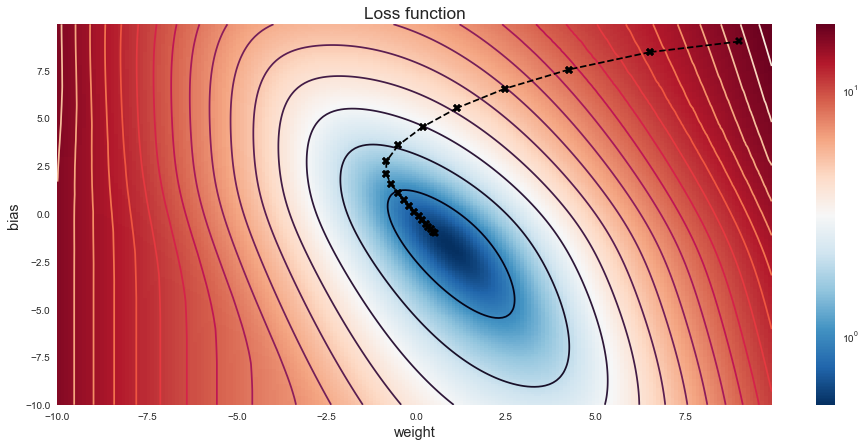

In [60]:
fig , ax_loss = plt.subplots(figsize=(16,7))
plt.pcolor(x_grid , y_grid , loss_grid , norm=colors.LogNorm() , cmap='RdBu_r')
plt.colorbar()
contour = plt.contour(x_grid, y_grid, loss_grid,20)
plt.title('Loss function'); plt.xlabel('weight'); plt.ylabel('bias');
for i in range(20):
    old_weight, old_bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    model.fit(iris[['petal_width']], iris[['isVirginica']], epochs=30, verbose=0)
    weight, bias = model.get_weights()[0][0][0], model.get_weights()[1][0]
    plt.plot([old_weight,weight],[old_bias,bias],'kX--',markersize=8)

# (Section 3) Neural Networks: when linear methods are not sufficient

# 3.1 Versicolor

In [61]:
iris['isVersicolor'] = (iris['species'] == 'versicolor').apply(int)
iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species,isVirginica,isVersicolor
106,4.9,2.5,4.5,1.7,virginica,1,0
57,4.9,2.4,3.3,1.0,versicolor,0,1
85,6.0,3.4,4.5,1.6,versicolor,0,1
45,4.8,3.0,1.4,0.3,setosa,0,0
84,5.4,3.0,4.5,1.5,versicolor,0,1


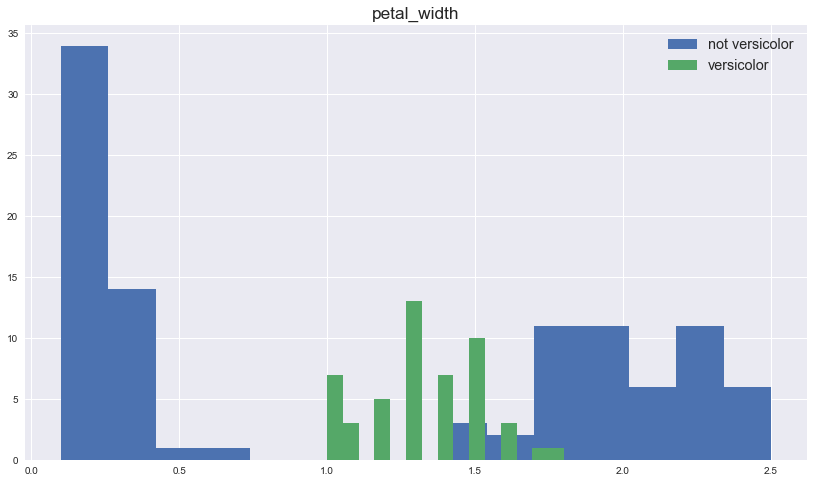

In [63]:
fig, ax = plt.subplots(figsize=(14,8))
iris.groupby('isVersicolor').hist(column='petal_width', ax=ax, bins=15);
plt.legend(['not versicolor', 'versicolor']);

## Goal: determine if an iris is a versicolor knowing its petal width

# 3.2 Let's try  logistic regression

In [64]:
model = Sequential([
    Dense(1,input_dim=1,kernel_regularizer=regularizers.l2(.1)),
    Activation('sigmoid'),
])

In [65]:
model.compile(optimizer=optimizers.SGD(lr=0.05), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [66]:
model.fit(iris[['petal_width']], iris[['isVersicolor']], epochs=500)

Epoch 1/500
150/150 [==============================] - 0s 724us/step - loss: 0.6866 - acc: 0.6667
Epoch 2/500
150/150 [==============================] - 0s 86us/step - loss: 0.6833 - acc: 0.6667
Epoch 3/500
150/150 [==============================] - 0s 69us/step - loss: 0.6794 - acc: 0.6667
Epoch 4/500
150/150 [==============================] - 0s 71us/step - loss: 0.6768 - acc: 0.6667
Epoch 5/500
150/150 [==============================] - 0s 93us/step - loss: 0.6742 - acc: 0.6667
Epoch 6/500
150/150 [==============================] - 0s 88us/step - loss: 0.6719 - acc: 0.6667
Epoch 7/500
150/150 [==============================] - 0s 88us/step - loss: 0.6702 - acc: 0.6667
Epoch 8/500
150/150 [==============================] - 0s 82us/step - loss: 0.6688 - acc: 0.6667
Epoch 9/500
150/150 [==============================] - 0s 85us/step - loss: 0.6664 - acc: 0.6667
Epoch 10/500
150/150 [==============================] - 0s 95us/step - loss: 0.6647 - acc: 0.6667
Epoch 11/500
150/150 [======

150/150 [==============================] - 0s 97us/step - loss: 0.6351 - acc: 0.6667
Epoch 82/500
150/150 [==============================] - 0s 86us/step - loss: 0.6352 - acc: 0.6667
Epoch 83/500
150/150 [==============================] - 0s 88us/step - loss: 0.6348 - acc: 0.6667
Epoch 84/500
150/150 [==============================] - 0s 92us/step - loss: 0.6351 - acc: 0.6667
Epoch 85/500
150/150 [==============================] - 0s 82us/step - loss: 0.6347 - acc: 0.6667
Epoch 86/500
150/150 [==============================] - 0s 84us/step - loss: 0.6347 - acc: 0.6667
Epoch 87/500
150/150 [==============================] - 0s 85us/step - loss: 0.6351 - acc: 0.6667
Epoch 88/500
150/150 [==============================] - 0s 87us/step - loss: 0.6346 - acc: 0.6667
Epoch 89/500
150/150 [==============================] - 0s 85us/step - loss: 0.6352 - acc: 0.6667
Epoch 90/500
150/150 [==============================] - 0s 90us/step - loss: 0.6346 - acc: 0.6667
Epoch 91/500
150/150 [===========

150/150 [==============================] - 0s 94us/step - loss: 0.6345 - acc: 0.6667
Epoch 164/500
150/150 [==============================] - 0s 76us/step - loss: 0.6344 - acc: 0.6667
Epoch 165/500
150/150 [==============================] - 0s 87us/step - loss: 0.6342 - acc: 0.6667
Epoch 166/500
150/150 [==============================] - 0s 98us/step - loss: 0.6341 - acc: 0.6667
Epoch 167/500
150/150 [==============================] - 0s 88us/step - loss: 0.6342 - acc: 0.6667
Epoch 168/500
150/150 [==============================] - 0s 92us/step - loss: 0.6341 - acc: 0.6667
Epoch 169/500
150/150 [==============================] - 0s 85us/step - loss: 0.6340 - acc: 0.6667
Epoch 170/500
150/150 [==============================] - 0s 85us/step - loss: 0.6345 - acc: 0.6667
Epoch 171/500
150/150 [==============================] - 0s 96us/step - loss: 0.6340 - acc: 0.6667
Epoch 172/500
150/150 [==============================] - 0s 95us/step - loss: 0.6342 - acc: 0.6667
Epoch 173/500
150/150 [=

150/150 [==============================] - 0s 78us/step - loss: 0.6341 - acc: 0.6667
Epoch 246/500
150/150 [==============================] - 0s 84us/step - loss: 0.6343 - acc: 0.6667
Epoch 247/500
150/150 [==============================] - 0s 80us/step - loss: 0.6343 - acc: 0.6667
Epoch 248/500
150/150 [==============================] - 0s 90us/step - loss: 0.6340 - acc: 0.6667
Epoch 249/500
150/150 [==============================] - 0s 88us/step - loss: 0.6341 - acc: 0.6667
Epoch 250/500
150/150 [==============================] - 0s 85us/step - loss: 0.6344 - acc: 0.6667
Epoch 251/500
150/150 [==============================] - 0s 83us/step - loss: 0.6343 - acc: 0.6667
Epoch 252/500
150/150 [==============================] - 0s 87us/step - loss: 0.6344 - acc: 0.6667
Epoch 253/500
150/150 [==============================] - 0s 85us/step - loss: 0.6341 - acc: 0.6667
Epoch 254/500
150/150 [==============================] - 0s 87us/step - loss: 0.6339 - acc: 0.6667
Epoch 255/500
150/150 [=

150/150 [==============================] - 0s 96us/step - loss: 0.6346 - acc: 0.6667
Epoch 328/500
150/150 [==============================] - ETA: 0s - loss: 0.6866 - acc: 0.593 - 0s 78us/step - loss: 0.6340 - acc: 0.6667
Epoch 329/500
150/150 [==============================] - 0s 81us/step - loss: 0.6343 - acc: 0.6667
Epoch 330/500
150/150 [==============================] - 0s 73us/step - loss: 0.6338 - acc: 0.6667
Epoch 331/500
150/150 [==============================] - 0s 93us/step - loss: 0.6342 - acc: 0.6667
Epoch 332/500
150/150 [==============================] - 0s 92us/step - loss: 0.6339 - acc: 0.6667
Epoch 333/500
150/150 [==============================] - 0s 88us/step - loss: 0.6344 - acc: 0.6667
Epoch 334/500
150/150 [==============================] - 0s 101us/step - loss: 0.6342 - acc: 0.6667
Epoch 335/500
150/150 [==============================] - 0s 111us/step - loss: 0.6344 - acc: 0.6667
Epoch 336/500
150/150 [==============================] - 0s 93us/step - loss: 0.633

150/150 [==============================] - 0s 78us/step - loss: 0.6341 - acc: 0.6667
Epoch 408/500
150/150 [==============================] - 0s 93us/step - loss: 0.6340 - acc: 0.6667
Epoch 409/500
150/150 [==============================] - 0s 94us/step - loss: 0.6340 - acc: 0.6667
Epoch 410/500
150/150 [==============================] - 0s 78us/step - loss: 0.6344 - acc: 0.6667
Epoch 411/500
150/150 [==============================] - 0s 98us/step - loss: 0.6343 - acc: 0.6667
Epoch 412/500
150/150 [==============================] - 0s 96us/step - loss: 0.6340 - acc: 0.6667
Epoch 413/500
150/150 [==============================] - ETA: 0s - loss: 0.7662 - acc: 0.468 - 0s 86us/step - loss: 0.6350 - acc: 0.6667
Epoch 414/500
150/150 [==============================] - 0s 87us/step - loss: 0.6348 - acc: 0.6667
Epoch 415/500
150/150 [==============================] - 0s 97us/step - loss: 0.6339 - acc: 0.6667
Epoch 416/500
150/150 [==============================] - 0s 101us/step - loss: 0.6343

150/150 [==============================] - 0s 89us/step - loss: 0.6341 - acc: 0.6667
Epoch 489/500
150/150 [==============================] - 0s 87us/step - loss: 0.6340 - acc: 0.6667
Epoch 490/500
150/150 [==============================] - 0s 84us/step - loss: 0.6342 - acc: 0.6667
Epoch 491/500
150/150 [==============================] - 0s 79us/step - loss: 0.6350 - acc: 0.6667
Epoch 492/500
150/150 [==============================] - 0s 80us/step - loss: 0.6339 - acc: 0.6667
Epoch 493/500
150/150 [==============================] - 0s 88us/step - loss: 0.6339 - acc: 0.6667
Epoch 494/500
150/150 [==============================] - 0s 91us/step - loss: 0.6340 - acc: 0.6667
Epoch 495/500
150/150 [==============================] - 0s 83us/step - loss: 0.6340 - acc: 0.6667
Epoch 496/500
150/150 [==============================] - 0s 80us/step - loss: 0.6343 - acc: 0.6667
Epoch 497/500
150/150 [==============================] - 0s 96us/step - loss: 0.6342 - acc: 0.6667
Epoch 498/500
150/150 [=

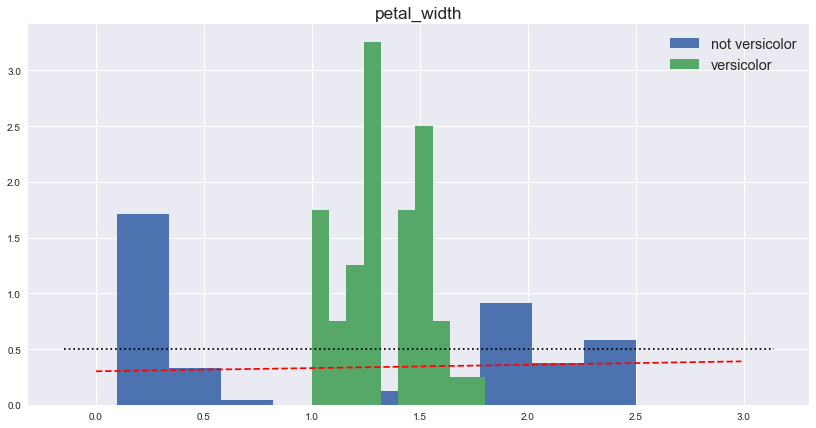

In [70]:
fig, ax = plt.subplots(figsize=(14,7))
iris.groupby('isVersicolor').hist(column='petal_width', normed=True, ax=ax);
plt.legend(['not versicolor', 'versicolor'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths, predicted_proba,'r--',label='proba')
plt.hlines(0.5, *ax.get_xlim(), linestyles='dotted');

## BAD NEWS: PREDICTED PROBABILITIES BY LOGISTIC REGRESSION CAN NOT UP AND DOWN

# 3.3 Neural networks with hidden layers

In [71]:
model = Sequential( [
Dense(3, input_dim=1 , activation ='sigmoid' ),
#model.add(Activation('sigmoid'))
Dense(1, input_dim=1 ),
Activation('sigmoid')
] )
model.compile(optimizer=optimizers.SGD(lr=.1), loss='binary_crossentropy')

![NN](../reports/figures/nn_color.png)

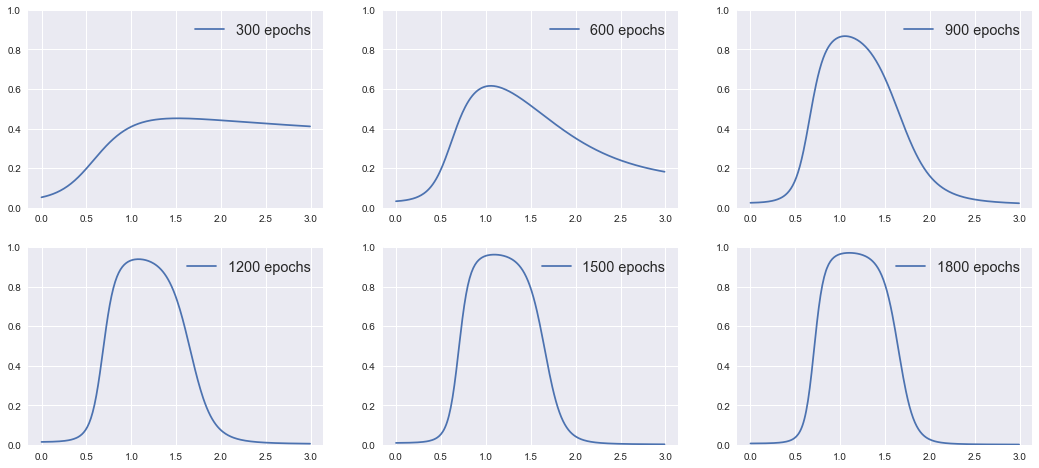

In [72]:
plt.subplots(nrows=3,ncols=3,figsize=(18,8),sharex=True,sharey=True)
for i in range(1,7):
    plt.subplot(2,3, i)
    model.fit(iris[['petal_width']], iris[['isVersicolor']],epochs=300,verbose=0)
    probas = model.predict(petal_widths.reshape(-1,1))[:,0]
    plt.plot(petal_widths,probas,label='{} epochs'.format(i*300))
    plt.ylim((0,1))
    plt.legend()

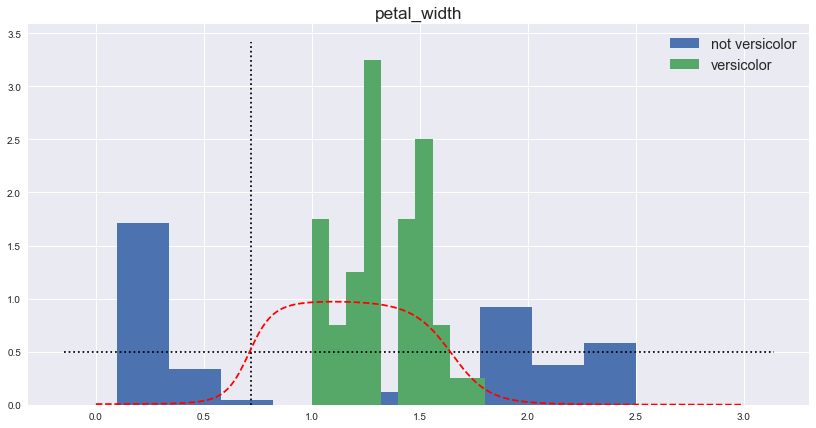

In [75]:
fig, ax = plt.subplots(figsize=(14,7))
iris.groupby('isVersicolor').hist(column='petal_width', normed=True, ax=ax);
plt.legend(['not versicolor', 'versicolor'])
predicted_proba = model.predict(petal_widths.reshape(-1,1))[:,0]
plt.plot(petal_widths, predicted_proba,'r--',label='proba')
plt.hlines(0.5, *ax.get_xlim(), linestyles='dotted')
plt.vlines(petal_widths[np.argmax(predicted_proba > 0.5)], \
           *ax.get_ylim(), linestyles='dotted');

# Conclusion
* Neural Networks are model depending on paramters
* With loss function, one can fit the paramters with the data
* Keras: clear interface to use neural 